# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Apply the default theme
sns.set_theme()

# Load Datasets

In [2]:
train = pd.read_csv('/kaggle/input/readmission-dataset/train_df.csv')
test = pd.read_csv('/kaggle/input/readmission-dataset/test_df.csv')
sample_sub = pd.read_csv('/kaggle/input/readmission-dataset/sample_submission.csv')

# Data Summary

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Use list comprehension to iterate over each column
    summary = [
        [col, df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df.duplicated().sum()]
        for col in df.columns
    ]

    # Create a DataFrame from the list of lists
    df_check = pd.DataFrame(summary, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])

    return df_check

In [4]:
print("Training Data Summary")
display(check(train))
display(train.head())
print("Testing Data Summary")
display(check(test))
display(test.head())
print("Sample Submission Summary")
display(check(sample_sub))
display(sample_sub.head())

Training Data Summary


,column,dtype,instances,unique,sum_null,duplicates
0,age,int64,5000,72,0,4
1,gender,object,5000,2,0,4
2,primary_diagnosis,object,5000,5,0,4
3,num_procedures,int64,5000,10,0,4
4,days_in_hospital,int64,5000,14,0,4
5,comorbidity_score,int64,5000,5,0,4
6,discharge_to,object,5000,4,0,4
7,readmitted,int64,5000,2,0,4


,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
0,69,Male,Heart Disease,1,2,1,Home Health Care,0
1,32,Female,COPD,2,13,2,Rehabilitation Facility,0
2,89,Male,Diabetes,1,7,1,Home,0
3,78,Male,COPD,9,2,2,Skilled Nursing Facility,0
4,38,Male,Diabetes,6,4,4,Rehabilitation Facility,0


Testing Data Summary


,column,dtype,instances,unique,sum_null,duplicates
0,age,int64,2000,72,0,1
1,gender,object,2000,2,0,1
2,primary_diagnosis,object,2000,5,0,1
3,num_procedures,int64,2000,10,0,1
4,days_in_hospital,int64,2000,14,0,1
5,comorbidity_score,int64,2000,5,0,1
6,discharge_to,object,2000,4,0,1


,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to
0,52,Male,Heart Disease,3,9,3,Home
1,47,Female,Diabetes,2,4,0,Skilled Nursing Facility
2,72,Female,Heart Disease,7,12,4,Home
3,18,Female,COPD,5,14,3,Home
4,32,Male,Heart Disease,9,2,4,Rehabilitation Facility


Sample Submission Summary


,column,dtype,instances,unique,sum_null,duplicates
0,Patient_ID,int64,2000,2000,0,0
1,readmitted,int64,2000,2,0,0


,Patient_ID,readmitted
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


**Investigating duplicated rows**

In [5]:
# View all duplicated rows including the first occurrence
all_duplicates = train[train.duplicated(keep=False)]
all_duplicates

,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
128,79,Male,Diabetes,3,8,1,Rehabilitation Facility,0
135,79,Male,Diabetes,3,8,1,Rehabilitation Facility,0
182,33,Female,Heart Disease,1,1,1,Home,0
319,49,Male,Heart Disease,2,6,1,Home,0
1227,56,Male,Heart Disease,3,5,4,Home Health Care,0
3091,33,Female,Heart Disease,1,1,1,Home,0
3552,56,Male,Heart Disease,3,5,4,Home Health Care,0
3671,49,Male,Heart Disease,2,6,1,Home,0


In [6]:
# Add Patient_ID to the training data
train_with_id = pd.concat([train, sample_sub['Patient_ID']], axis=1)

# Check for duplicates using all columns, including the newly added Patient_ID
duplicates = train_with_id[train_with_id.duplicated(keep=False)]
print(f"Number of duplicate rows: {len(duplicates)}")
display(duplicates)

Number of duplicate rows: 0


,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted,Patient_ID


In [7]:
# Remove Patient_ID column from the training data
train = train_with_id.drop('Patient_ID', axis=1)

# Visualizations

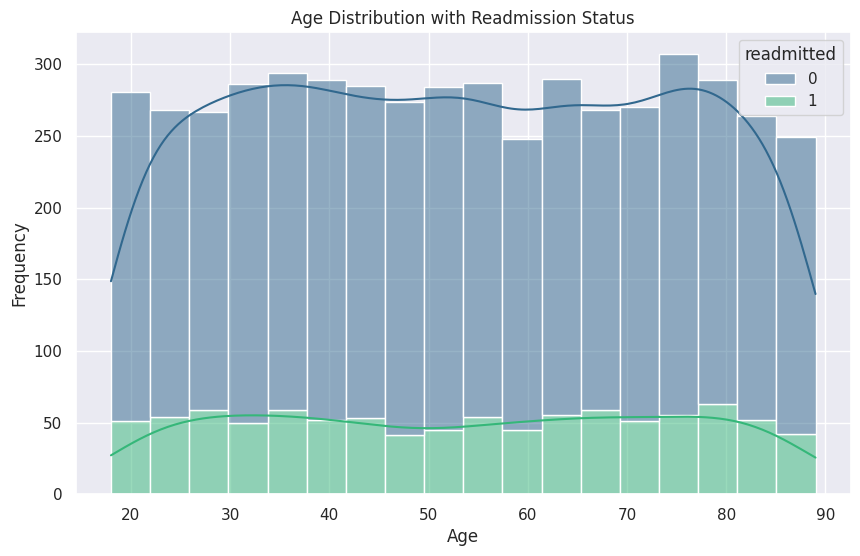

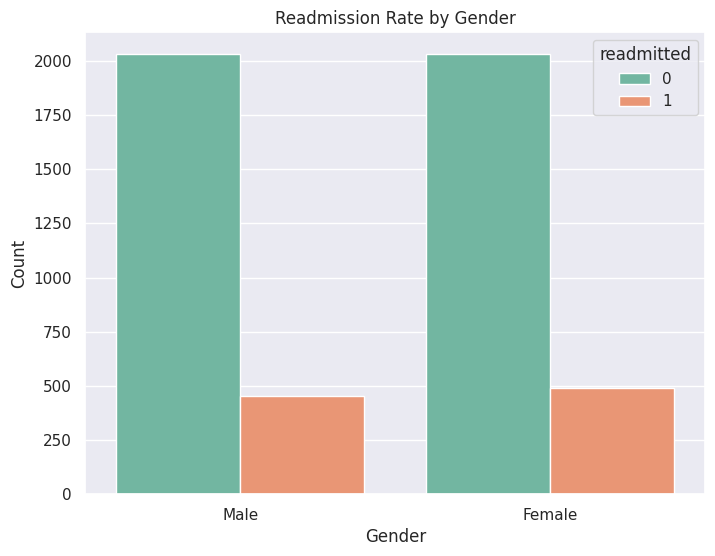

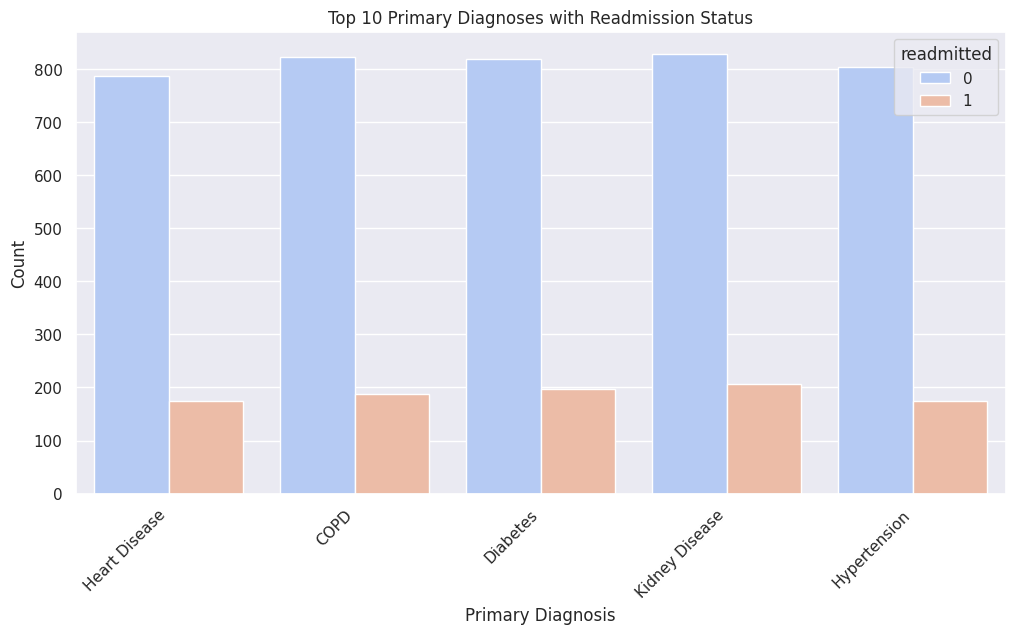

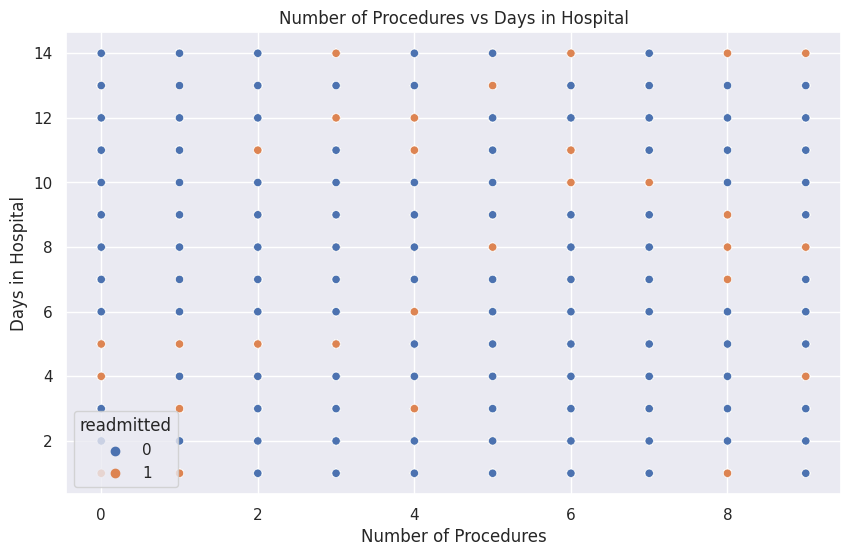

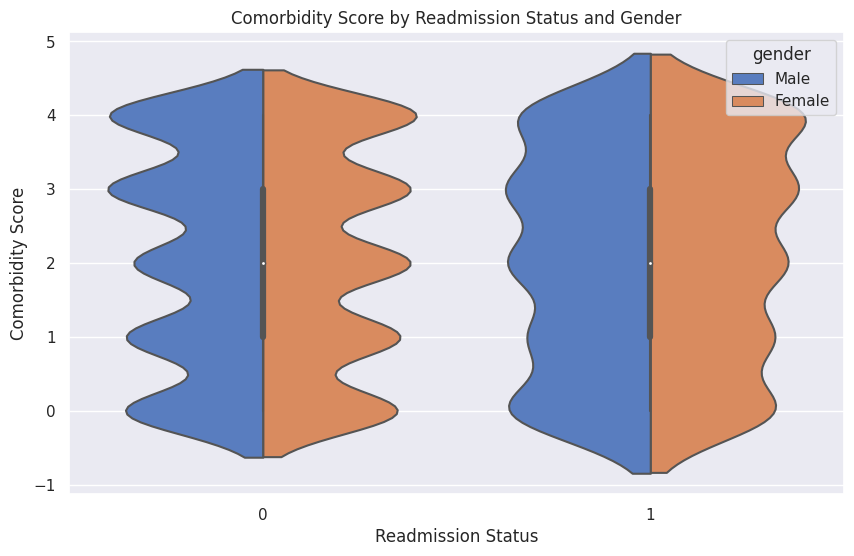

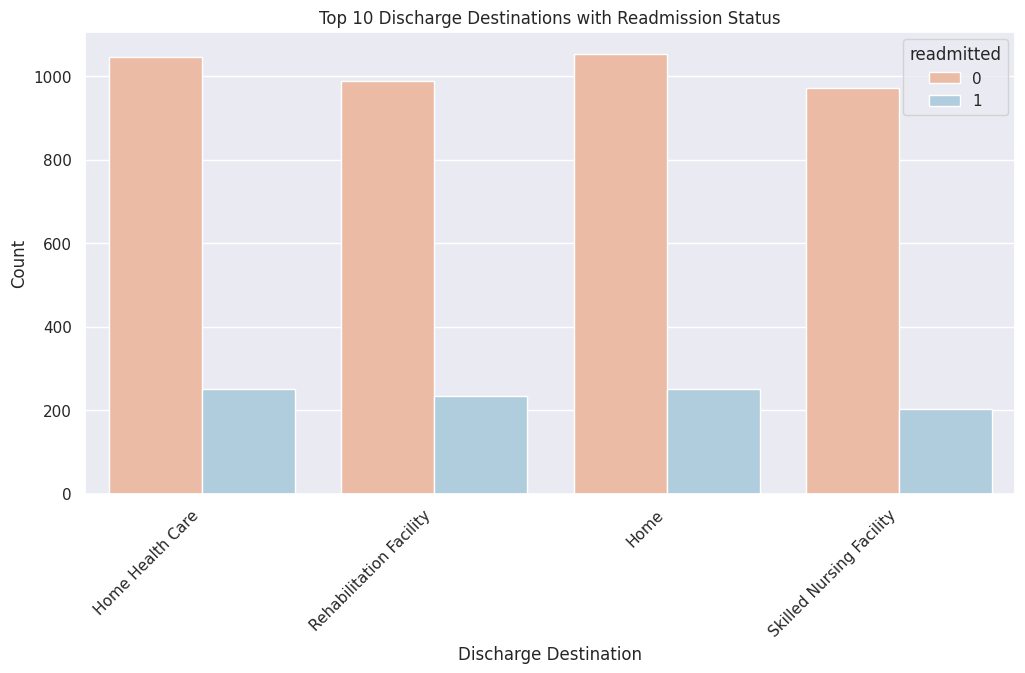

In [8]:
# Distribution of Age and Readmission Rates
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='age', hue='readmitted', multiple='stack', kde=True, palette='viridis')
plt.title('Age Distribution with Readmission Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender wise Readmission Rates
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='gender', hue='readmitted', palette='Set2')
plt.title('Readmission Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Primary Diagnosis Breakdown
plt.figure(figsize=(12, 6))
primary_diag_count = train['primary_diagnosis'].value_counts().nlargest(10).index
sns.countplot(data=train[train['primary_diagnosis'].isin(primary_diag_count)], x='primary_diagnosis', hue='readmitted', palette='coolwarm')
plt.title('Top 10 Primary Diagnoses with Readmission Status')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Procedures vs. Days in Hospital
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='num_procedures', y='days_in_hospital', hue='readmitted', palette='deep')
plt.title('Number of Procedures vs Days in Hospital')
plt.xlabel('Number of Procedures')
plt.ylabel('Days in Hospital')
plt.show()

# Comorbidity Score Distribution
plt.figure(figsize=(10, 6))
sns.violinplot(data=train, x='readmitted', y='comorbidity_score', hue='gender', split=True, palette='muted')
plt.title('Comorbidity Score by Readmission Status and Gender')
plt.xlabel('Readmission Status')
plt.ylabel('Comorbidity Score')
plt.show()

# Discharge Destination and Readmission Rates
plt.figure(figsize=(12, 6))
discharge_count = train['discharge_to'].value_counts().nlargest(10).index
sns.countplot(data=train[train['discharge_to'].isin(discharge_count)], x='discharge_to', hue='readmitted', palette='RdBu')
plt.title('Top 10 Discharge Destinations with Readmission Status')
plt.xlabel('Discharge Destination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Split the dataset into features (X) and target (y)
X = train.drop('readmitted', axis=1)
y = train['readmitted']

# Categorical and numerical columns
categorical_cols = ['gender', 'primary_diagnosis', 'discharge_to']
numerical_cols = ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']

# Preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the model pipeline with preprocessing and RandomForestClassifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1218
           1       0.21      0.02      0.04       282

    accuracy                           0.80      1500
   macro avg       0.51      0.50      0.46      1500
weighted avg       0.70      0.80      0.73      1500

Confusion Matrix:
 [[1196   22]
 [ 276    6]]
AUC-ROC Score: 0.5029536270365323


**The model performs well on the majority class (0) but very poorly on the minority class (1). This suggests the model is biased towards the majority class.
It's not effectively learning to distinguish between classes. The high overall accuracy is misleading due to class imbalance. More work needs to be done.**

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1218
           1       0.21      0.02      0.04       282

    accuracy                           0.80      1500
   macro avg       0.51      0.50      0.46      1500
weighted avg       0.70      0.80      0.73      1500

Confusion Matrix:
 [[1196   22]
 [ 276    6]]
AUC-ROC Score: 0.5029536270365323


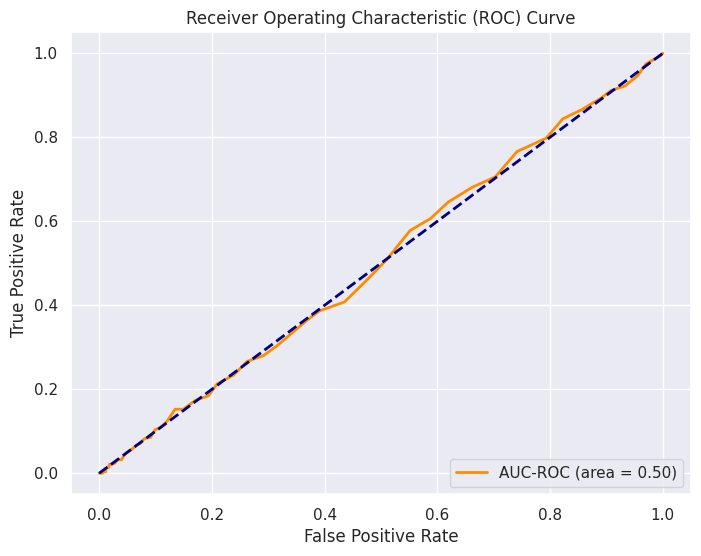

In [10]:
# Make predictions on actual test dataframe 
test_predictions = model.predict(test)
test_pred_proba = model.predict_proba(test)[:, 1]

# Evaluate the model on the holdout test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

# AUC-ROC Curve Visualization
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC-ROC (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()